# Análisis de resultados

## 1. Set up

In [1]:
import matplotlib.pyplot as plt
import os

def read_objectives_nsga2(file_path):
    
    obj1 = []
    obj2 = []
    
    file = open(file_path, 'r')
    for line in file:
        l = line.strip().split()
        if len(l) > 0 and l[0] != '#':
            obj1.append(float(l[0]))
            obj2.append(float(l[1]))
    file.close()

    return obj1, obj2

def read_objectives_ampl(file_path):
    
    obj1 = []
    obj2 = []
    
    file = open(file_path, 'r')
    for line in file:
        l = line.strip().split()
        if len(l) > 0:
            obj1.append(float(l[3]))
            obj2.append(float(l[4]))
    file.close()

    return obj1, obj2

def scatter_plot(obj1, obj2, title, xlabel, ylabel):
    plt.figure(figsize=(7, 4))
    plt.scatter(obj1, obj2, color='blue', alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.close()

def double_scatter_plot(obj1_nsga2, obj2_nsga2, obj1_ampl, obj2_ampl, title, xlabel, ylabel):
    plt.figure(figsize=(7, 4))
    plt.scatter(obj1_nsga2, obj2_nsga2, color='blue', alpha=0.5, label='NSGA-II')
    plt.scatter(obj1_ampl, obj2_ampl, color='red', alpha=0.5, label='AMPL')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

## Ejemplo BOSCPV

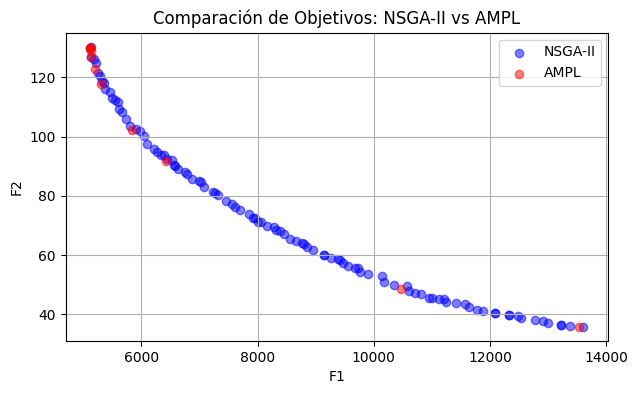

In [2]:


obj1, obj2 = read_objectives_nsga2("best_popBOSCPV.out")
amplobj1, amplobj2 = read_objectives_ampl("ResultadosAMPL/AMPLBOSCPV.txt")
double_scatter_plot(obj1, obj2, amplobj1, amplobj2, 'Comparación de Objetivos: NSGA-II vs AMPL', 'F1', 'F2')


## Ejemplo BOSCP102D

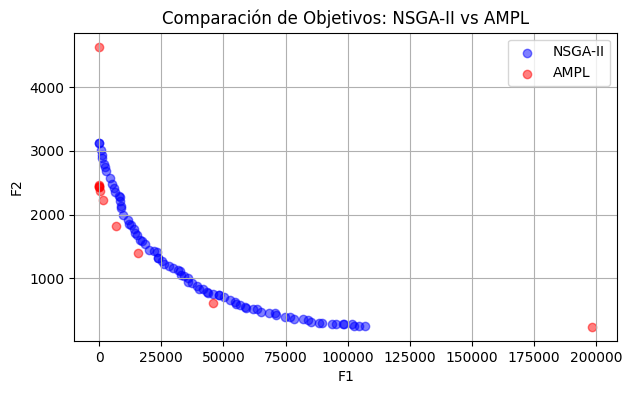

In [3]:

obj1, obj2 = read_objectives_nsga2("best_popBOSCP102D.out")
amplobj1, amplobj2 = read_objectives_ampl("ResultadosAMPL/AMPLBOSCP102D.txt")
double_scatter_plot(obj1, obj2, amplobj1, amplobj2, 'Comparación de Objetivos: NSGA-II vs AMPL', 'F1', 'F2')


## Ejemplo BOSCP201D

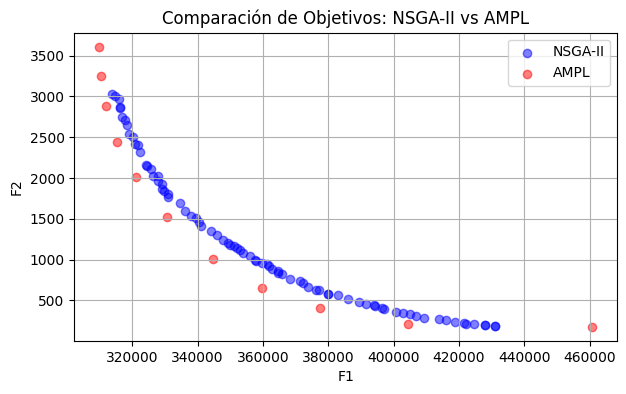

In [4]:

obj1, obj2 = read_objectives_nsga2("best_popBOSCP201D.out")
#obj1, obj2 = read_objectives_nsga2("best_pop.out")
amplobj1, amplobj2 = read_objectives_ampl("ResultadosAMPL/AMPLBOSCP201D.txt")
double_scatter_plot(obj1, obj2, amplobj1, amplobj2, 'Comparación de Objetivos: NSGA-II vs AMPL', 'F1', 'F2')



## Pruebas de rendimiento

In [7]:
import os
import subprocess
import matplotlib.pyplot as plt

def run_wsl_command(cmd):
    result = subprocess.run(["wsl", "bash", "-c", cmd], capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)

seeds = open("seeds.txt").read().strip().split("\n")
instances = ["BOSCPV", "BOSCP102D", "BOSCP201D"]
base_dir = "/mnt/c/Users/scarl/OneDrive/Desktop/NSGA-II"
execution = f"cd {base_dir} && ./nsga2r {{seed}} {{instancia}} {{npop}} {{maxgen}} 2 {{p_cross}} {{p_mut}}"

#for seed in seeds:

    #print(instances[0], seed)
    #run_wsl_command(execution.format(seed=seed, instancia=instances[0], npop=100, maxgen=1000, p_cross=0.9, p_mut=0.01))
    #run_wsl_command(execution.format(seed=seed, instancia=instances[1], npop=80, maxgen=10000, p_cross=0.8, p_mut=0.001))
    #run_wsl_command(execution.format(seed=seed, instancia=instances[2], npop=80, maxgen=10000, p_cross=0.8, p_mut=0.001))    


## Análisis de resultados

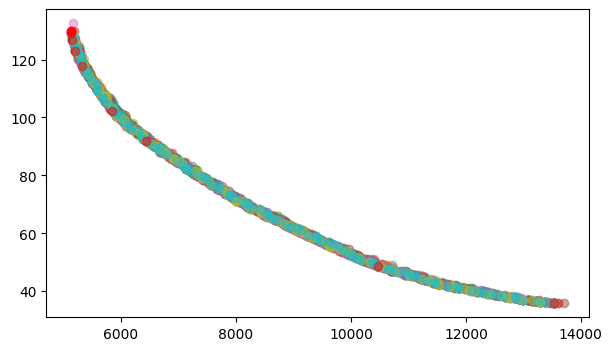

In [8]:

values = []
amplobj1, amplobj2 = read_objectives_ampl("ResultadosAMPL/AMPLBOSCPV.txt")

for seed in seeds:
    values.append(read_objectives_nsga2(f"ResultadosNSGA2/BOSCPV/{seed}0.out"))

plt.figure(figsize=(7, 4))
#I want to make a scatter plot with the values in values
#each pair of obj1 and obj2 in values should have a different color
#each should be a separate plot

for i, (obj1, obj2) in enumerate(values):
    plt.scatter(obj1, obj2, alpha=0.5, label=f'Seed {i+1}')

plt.scatter(amplobj1, amplobj2, color='red', alpha=0.5, label='AMPL')

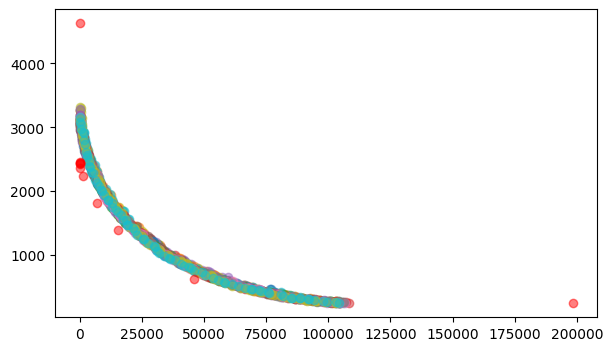

In [9]:
values = []
amplobj1, amplobj2 = read_objectives_ampl("ResultadosAMPL/AMPLBOSCP102D.txt")

for seed in seeds:
    values.append(read_objectives_nsga2(f"ResultadosNSGA2/BOSCP102D/{seed}0.out"))

plt.figure(figsize=(7, 4))
#I want to make a scatter plot with the values in values
#each pair of obj1 and obj2 in values should have a different color
#each should be a separate plot

for i, (obj1, obj2) in enumerate(values):
    plt.scatter(obj1, obj2, alpha=0.5, label=f'Seed {i+1}')
    
plt.scatter(amplobj1, amplobj2, color='red', alpha=0.5, label='AMPL')

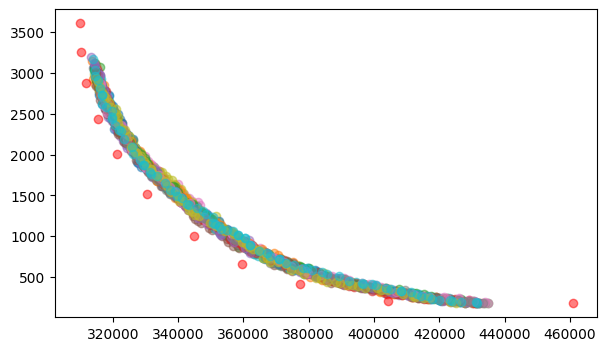

In [10]:
values = []
amplobj1, amplobj2 = read_objectives_ampl("ResultadosAMPL/AMPLBOSCP201D.txt")

for seed in seeds:
    values.append(read_objectives_nsga2(f"ResultadosNSGA2/BOSCP201D/{seed}0.out"))

plt.figure(figsize=(7, 4))
#I want to make a scatter plot with the values in values
#each pair of obj1 and obj2 in values should have a different color
#each should be a separate plot

for i, (obj1, obj2) in enumerate(values):
    plt.scatter(obj1, obj2, alpha=0.5, label=f'Seed {i+1}')
    
plt.scatter(amplobj1, amplobj2, color='red', alpha=0.5, label='AMPL')